# Caso de estudio: Notas periodísticas del Newyork Times

Autor: Alan Badillo Salas

Correo: badillo.soft@hotmail.com

Github: https://github.com/badillosoft/data

2 de noviembre de 2020

## Adquisición de datos

Fuente de origen: Archivo de texto (.txt)

Estructura destino: Lista de cadenas de texto, cada una representa una línea del archivo

In [2]:
filename = "nytimes_news_articles.txt"

file = open(filename)

content = file.read()

lines = content.split("\n")

print("Líneas: {}".format(len(lines)))

lines[:5]

Líneas: 192578


['URL: http://www.nytimes.com/2016/06/30/sports/baseball/washington-nationals-max-scherzer-baffles-mets-completing-a-sweep.html',
 '',
 'WASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.',
 '“We were going to ride our pitching,” Manager Terry Collins said before Wednesday’s game. “But we’re not riding it right now. We’ve got as many problems with our pitching as we do anything.”',
 'Wednesday’s 4-2 loss to the Washington Nationals was cruel for the already-limping Mets. Pitching in Steven Matz’s place, the spot starter Logan Verrett allowed two runs over five innings. But even that was too large a deficit for the Mets’ lineup to overcome against Max Scherzer, the Nationals’ starter.']

## Limpieza de datos

Estructura de entrada: Lista de cadenas de texto, dónde cada entrada representa una línea

Limpieza: Quitar las líneas vacías

In [3]:
import re

lines = list(filter(lambda line: not re.search(r"^\s*$", line), lines))

print("Líneas: {}".format(len(lines)))

lines[:5]

Líneas: 174788


['URL: http://www.nytimes.com/2016/06/30/sports/baseball/washington-nationals-max-scherzer-baffles-mets-completing-a-sweep.html',
 'WASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.',
 '“We were going to ride our pitching,” Manager Terry Collins said before Wednesday’s game. “But we’re not riding it right now. We’ve got as many problems with our pitching as we do anything.”',
 'Wednesday’s 4-2 loss to the Washington Nationals was cruel for the already-limping Mets. Pitching in Steven Matz’s place, the spot starter Logan Verrett allowed two runs over five innings. But even that was too large a deficit for the Mets’ lineup to overcome against Max Scherzer, the Nationals’ starter.',
 '“We’re not even giving ourselves chances,” Collins said, adding later, “We just can’t

## Estructuración de datos

Estructura de entrada: Lista de cadenas de texto, dónde cada entrada representa una línea

Estructuración: Detectar cada nota que consiste de una URL y un texto en varias líneas

In [5]:
notes = []
note_url = ""
note_lines = []

def addNote(url, lines):
    if len(lines) == 0:
        return
    notes.append({
        "url": url,
        "lines": lines
    })

for line in lines:
    if re.search("^URL:", line):
        addNote(note_url, note_lines)
        note_url = line
        note_lines = []
        continue
    note_lines.append(line)
   
addNote(note_url, note_lines)

print("Notas: {}".format(len(notes)))

notes[:1]

Notas: 8884


[{'url': 'URL: http://www.nytimes.com/2016/06/30/sports/baseball/washington-nationals-max-scherzer-baffles-mets-completing-a-sweep.html',
  'lines': ['WASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.',
   '“We were going to ride our pitching,” Manager Terry Collins said before Wednesday’s game. “But we’re not riding it right now. We’ve got as many problems with our pitching as we do anything.”',
   'Wednesday’s 4-2 loss to the Washington Nationals was cruel for the already-limping Mets. Pitching in Steven Matz’s place, the spot starter Logan Verrett allowed two runs over five innings. But even that was too large a deficit for the Mets’ lineup to overcome against Max Scherzer, the Nationals’ starter.',
   '“We’re not even giving ourselves chances,” Collins said, add

## Procesamiento de datos

Estructura de entrada: Lista de diccionarios, cada diccionario contiene la información de una nota (url: texto, lines: lista de textos)

Procesamiento: Extraer de la URL la fecha (año, mes y día), las categorías, el título codificado y la lista de palabras clave.

In [258]:
urls = [note["url"] for note in notes]

urls[:10]

['URL: http://www.nytimes.com/2016/06/30/sports/baseball/washington-nationals-max-scherzer-baffles-mets-completing-a-sweep.html',
 'URL: http://www.nytimes.com/2016/06/30/nyregion/mayor-de-blasios-counsel-to-leave-next-month-to-lead-police-review-board.html',
 'URL: http://www.nytimes.com/2016/06/30/nyregion/three-men-charged-in-killing-of-cuomo-administration-lawyer.html',
 'URL: http://www.nytimes.com/2016/06/30/nyregion/tekserve-precursor-to-the-apple-store-to-close-after-29-years.html',
 'URL: http://www.nytimes.com/2016/06/30/sports/olympics/once-at-michael-phelpss-feet-and-still-chasing-them.html',
 'URL: http://www.nytimes.com/2016/06/30/sports/olympics/missy-franklin-breaks-through-in-trials-and-earns-a-return-to-olympics.html',
 'URL: http://www.nytimes.com/2016/06/30/business/dealbook/lionsgate-is-said-to-be-near-deal-to-buy-starz.html',
 'URL: http://www.nytimes.com/2016/06/30/nyregion/pool-rules-no-running-no-eating-or-drinking-no-men.html',
 'URL: http://www.nytimes.com/20

In [259]:
for note in notes:
    url = note["url"]
    note["link"] = re.sub(r"^URL:\s*", "", url)
    for match in re.findall(r"(\d{4}/\d{2}/\d{2})/(.*)", url):
        date = match[0]
        content = match[1]
        #print(date, content)
        match = re.search("/[\w-]+.html", content)
        left = content[:match.start()]
        right = content[match.start() + 1:]
        #print(left, right)
        categories = left.split("/")
        title = right.replace(".html", "").split("-")
        #print(categories, title)
        note["date"] = date
        year, month, day = tuple(date.split("/"))
        note["at_year"], note["at_month"], note["at_day"] = (int(year), int(month), int(day))
        note["categories"] = categories
        note["main_category"] = categories[0]
        note["title"] = title
        
def describe_note(note):
    print(note["link"])
    print(note["date"], (note["at_year"], note["at_month"], note["at_day"]))
    print(note["categories"], note["main_category"])
    print(note["title"])
    
for i in range(0, 5):
    print("-" * 20)
    describe_note(notes[i])

--------------------
http://www.nytimes.com/2016/06/30/sports/baseball/washington-nationals-max-scherzer-baffles-mets-completing-a-sweep.html
2016/06/30 (2016, 6, 30)
['sports', 'baseball'] sports
['washington', 'nationals', 'max', 'scherzer', 'baffles', 'mets', 'completing', 'a', 'sweep']
--------------------
http://www.nytimes.com/2016/06/30/nyregion/mayor-de-blasios-counsel-to-leave-next-month-to-lead-police-review-board.html
2016/06/30 (2016, 6, 30)
['nyregion'] nyregion
['mayor', 'de', 'blasios', 'counsel', 'to', 'leave', 'next', 'month', 'to', 'lead', 'police', 'review', 'board']
--------------------
http://www.nytimes.com/2016/06/30/nyregion/three-men-charged-in-killing-of-cuomo-administration-lawyer.html
2016/06/30 (2016, 6, 30)
['nyregion'] nyregion
['three', 'men', 'charged', 'in', 'killing', 'of', 'cuomo', 'administration', 'lawyer']
--------------------
http://www.nytimes.com/2016/06/30/nyregion/tekserve-precursor-to-the-apple-store-to-close-after-29-years.html
2016/06/30 (

### Procesadores

In [260]:
def notes_main_categories():
    return list(set([note["main_category"] for note in notes]))

main_categories = notes_main_categories()

main_categories

['fashion',
 'realestate',
 'health',
 'education',
 'theater',
 'upshot',
 'automobiles',
 'technology',
 'travel',
 'your-money',
 'dining',
 'style',
 'jobs',
 'nyregion',
 'sports',
 'world',
 't-magazine',
 'movies',
 'science',
 'universal',
 'books',
 'us',
 'pageoneplus',
 'magazine',
 'business',
 'nytnow',
 'insider',
 'arts']

In [261]:
def notes_by_category(name):
    return list(filter(lambda note: note["main_category"] == name, notes))

for name in main_categories:
    print(name, len(notes_by_category(name)))

fashion 618
realestate 166
health 78
education 27
theater 145
upshot 130
automobiles 16
technology 232
travel 142
your-money 60
dining 210
style 32
jobs 17
nyregion 663
sports 1268
world 1210
t-magazine 198
movies 126
science 162
universal 8
books 85
us 1199
pageoneplus 70
magazine 156
business 1041
nytnow 70
insider 94
arts 661


In [6]:
def search_in_note(note, text):
    search = re.split("\s+", text.lower())
    matches = []
    for line in note["lines"]:
        for word in search:
            for match in re.finditer(word, line.lower()):
                start, end = match.span()
                left = line[:start]
                center = line[start:end]
                right = line[end:]
                matches.append((word, start, end, left, right, center, line))
    return matches

search_in_note(notes[0], "bruised")

[('bruised',
  246,
  253,
  'WASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, ',
  ' and stretched thin.',
  'bruised',
  'WASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.')]

In [263]:
def search_in_note_text(note, text):
    search = re.split("\s+", text)
    matches = []
    for line in note["lines"]:
        match = re.search(text, line)
        if match:
            start, end = match.span()
            left = line[:start]
            center = line[start:end]
            right = line[end:]
            matches.append((text, start, end, left, right, center, line))
    return matches

search_in_note_text(notes[0], "Mets afloat")

[('Mets afloat',
  39,
  50,
  'WASHINGTON — Stellar pitching kept the ',
  ' in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.',
  'Mets afloat',
  'WASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.')]

In [264]:
def search_in_notes(notes, text, mode="word"):
    notes_filtered = []
    for note in notes:
        if mode == "text":
            matches = search_in_note_text(note, text)
        elif mode == "word":
            matches = search_in_note(note, text)
        if len(matches) > 0:
            notes_filtered.append((note, matches))
    return notes_filtered

notes_trump, notes_trump_matches = zip(*search_in_notes(notes_by_category("us"), "trump"))

print("Notes about Trump", len(notes_trump))

for note in notes_trump[:5]:
    print("-" * 20)
    describe_note(note)

Notes about Trump 497
--------------------
http://www.nytimes.com/2016/06/30/us/politics/huma-abedin-hillary-clinton-emails.html
2016/06/30 (2016, 6, 30)
['us', 'politics'] us
['huma', 'abedin', 'hillary', 'clinton', 'emails']
--------------------
http://www.nytimes.com/2016/06/30/us/politics/bernie-sanders.html
2016/06/30 (2016, 6, 30)
['us', 'politics'] us
['bernie', 'sanders']
--------------------
http://www.nytimes.com/2016/06/30/us/politics/jay-faison-republicans-elections-climate-change.html
2016/06/30 (2016, 6, 30)
['us', 'politics'] us
['jay', 'faison', 'republicans', 'elections', 'climate', 'change']
--------------------
http://www.nytimes.com/2016/06/30/us/politics/donald-trump-us-chamber-of-commerce-trade.html
2016/06/30 (2016, 6, 30)
['us', 'politics'] us
['donald', 'trump', 'us', 'chamber', 'of', 'commerce', 'trade']
--------------------
http://www.nytimes.com/2016/06/30/us/politics/bill-clinton-mark-cuban.html
2016/06/30 (2016, 6, 30)
['us', 'politics'] us
['bill', 'clint

In [265]:
def notes_timeline(notes):
    timeline = {}
    years = list(set([note["at_year"] for note in notes]))
    for year in years:
        notes_in_year = list(filter(lambda note: note["at_year"] == year, notes))
        months = list(set([note["at_month"] for note in notes_in_year]))
        for month in months:
            notes_in_month = list(filter(lambda note: note["at_month"] == month, notes_in_year))
            days = list(set([note["at_day"] for note in notes_in_month]))
            for day in days:
                notes_in_day = list(filter(lambda note: note["at_day"] == day, notes_in_month))
                date = "{:04d}/{:02d}/{:02d}".format(year, month, day)
                #print(date)
                timeline[date] = notes_in_day
    return timeline
    
notes_trump_timeline = notes_timeline(notes_trump)

count = 0
for date in notes_trump_timeline:
    if count > 5:
        continue
    notes_in_date = notes_trump_timeline[date]
    print(date)
    print("-" * 10)
    for note in notes_in_date:
        print(note["link"])
        count += 1
    print()

2016/04/18
----------
http://www.nytimes.com/2016/04/18/us/politics/donald-trump-delegates-new-york.html
http://www.nytimes.com/2016/04/18/us/politics/ted-cruz-conservative.html
http://www.nytimes.com/2016/04/18/us/politics/battle-for-senate.html

2016/04/19
----------
http://www.nytimes.com/2016/04/19/us/carnivals-maiden-voyage-to-cuba-draws-ire-and-bias-charges.html
http://www.nytimes.com/2016/04/19/us/politics/pressure-on-donald-trump-and-hillary-clinton-to-shine-at-home.html
http://www.nytimes.com/2016/04/19/us/politics/potential-gop-convention-fight-puts-older-hands-in-sudden-demand.html
http://www.nytimes.com/2016/04/19/us/panel-would-make-insurers-help-contain-rising-drug-costs.html
http://www.nytimes.com/2016/04/19/us/politics/donald-trump-central-park-south.html
http://www.nytimes.com/2016/04/19/us/politics/new-york-primary-trump-clinton-sanders.html
http://www.nytimes.com/2016/04/19/us/politics/supreme-court-immigration.html



In [266]:
def note_extract_actors(note):
    actors = []
    for line in note["lines"]:
        for match in re.finditer("[A-Z][a-z'’]+(\s+[A-Z][a-z'’]+)*", line):
            actors.append(match.group(0))
    return list(set(actors))
            
trump_actors = []
    
for date in notes_trump_timeline:
    notes_in_date = notes_trump_timeline[date]
    for note in notes_in_date:
        note["actors"] = note_extract_actors(note)
        trump_actors.extend(note["actors"])
    
count = 0
for date in notes_trump_timeline:
    if count > 5:
        continue
    notes_in_date = notes_trump_timeline[date]
    print(date)
    print("-" * 10)
    for note in notes_in_date:
        count += 1
        print(note["link"])
        print(note["actors"][:10], "...")
    print()
    
trump_actors = list(set(trump_actors))

trump_actors = list(zip(trump_actors, map(lambda actor: len(actor), trump_actors)))

trump_actors.sort(reverse=True, key=lambda t: t[1])

2016/04/18
----------
http://www.nytimes.com/2016/04/18/us/politics/donald-trump-delegates-new-york.html
['Boeing', 'Brownsville', 'Sunday', 'During', 'And', 'Obama', 'In Mount Vernon', 'In Brownsville', 'Baptist', 'Donald'] ...
http://www.nytimes.com/2016/04/18/us/politics/ted-cruz-conservative.html
['Texas', 'Frank Capra', 'Princeton University', 'Yet', 'There’s', 'George', 'Barry Goldwater', 'Being', 'And', 'Frank'] ...
http://www.nytimes.com/2016/04/18/us/politics/battle-for-senate.html
['She', 'Former Representative Tom Davis', 'In', 'Republicans', 'Reid', 'Joe Heck', 'Garland', 'But', 'There', 'President Obama’s Supreme Court'] ...

2016/04/19
----------
http://www.nytimes.com/2016/04/19/us/carnivals-maiden-voyage-to-cuba-draws-ire-and-bias-charges.html
['She', 'Doral', 'In', 'Republicans', 'Tunisia', 'As', 'Americans', 'Last', 'Francisco Marty', 'In Miami'] ...
http://www.nytimes.com/2016/04/19/us/politics/pressure-on-donald-trump-and-hillary-clinton-to-shine-at-home.html
['Hill

In [267]:
trump_senators = [actor for actor, size in trump_actors if re.search("^senator\s", actor.lower())]

trump_senators[:10]

['Senator Shelley Moore Capito',
 'Senator Sheldon Whitehouse',
 'Senator Kirsten Gillibrand',
 'Senator Richard Blumenthal',
 'Senator Bernie Sanders’s',
 'Senator Elizabeth Warren',
 'Senator Dianne Feinstein',
 'Senator Everett Dirksen',
 'Senator Lamar Alexander',
 'Senator Barry Goldwater']

In [268]:
trump_senators_rate = [len(search_in_notes(notes_trump, senator.replace("Senator ", ""), mode="text")) for senator in trump_senators]

trump_senators_rate[:10]

[2, 1, 1, 2, 7, 28, 8, 1, 3, 10]

In [269]:
trump_top_senators = list(zip(trump_senators, trump_senators_rate))

trump_top_senators.sort(reverse=True, key=lambda t: t[1])

trump_top_senators[:5]

[('Senator Sanders', 158),
 ('Senator Bernie Sanders', 156),
 ('Senator Cruz', 98),
 ('Senator Ted Cruz', 95),
 ('Senator Rubio', 49)]

## Visualización de datos

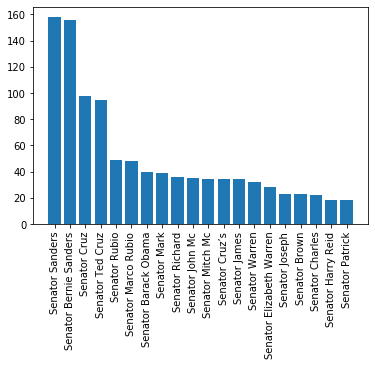

In [270]:
import matplotlib.pyplot as plt

x, y = zip(*trump_top_senators)

plt.bar(x[:20], y[:20])
plt.xticks(rotation="vertical")

plt.show()

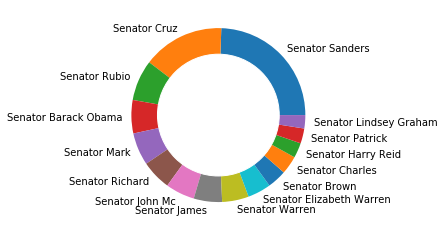

In [271]:
senators_raw, rate_raw = zip(*trump_top_senators)

ix = [0, 2, 4, 6, 7, 8, 9, 12, 13, 14, 16, 17, 18, 19, 20]

senators = [senators_raw[i] for i in ix]
rate = [rate_raw[i] for i in ix]

weights = rate
labels = senators

plt.pie(weights, labels=labels)

my_circle=plt.Circle( (0,0), 0.7, color="white")

p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

## Automatización de datos

### Tabla de datos

In [272]:
import pandas as pd

df = pd.DataFrame(list(zip(trump_senators, trump_senators_rate)), columns=["Senator", "Rate"])

df = df.sort_values(by=["Rate"], ascending=False)

df.head(10)

,Senator,Rate
76,Senator Sanders,158
12,Senator Bernie Sanders,156
89,Senator Cruz,98
68,Senator Ted Cruz,95
84,Senator Rubio,49
40,Senator Marco Rubio,48
26,Senator Barack Obama,40
87,Senator Mark,39
74,Senator Richard,36
72,Senator John Mc,35


### Exportación a excel

In [273]:
writer = pd.ExcelWriter("trump_senators.xlsx", engine="xlsxwriter")

df.to_excel(writer, sheet_name="Senators Rate")

writer.save()

### Reporte PDF

In [274]:
! pip install reportlab

In [275]:
! pip show reportlab

Name: reportlab
Version: 3.5.55
Summary: The Reportlab Toolkit
Home-page: http://www.reportlab.com/
Author: Andy Robinson, Robin Becker, the ReportLab team and the community
Author-email: reportlab-users@lists2.reportlab.com
License: BSD license (see license.txt for details), Copyright (c) 2000-2018, ReportLab Inc.
Location: /Users/dragon/anaconda3/lib/python3.7/site-packages
Requires: pillow
Required-by: svglib


In [276]:
! pip install svglib

In [277]:
! pip show svglib

Name: svglib
Version: 1.0.1
Summary: A pure-Python library for reading and converting SVG
Home-page: https://github.com/deeplook/svglib
Author: Dinu Gherman
Author-email: gherman@darwin.in-berlin.de
License: LGPL 3
Location: /Users/dragon/anaconda3/lib/python3.7/site-packages
Requires: tinycss2, cssselect2, reportlab, lxml
Required-by: 


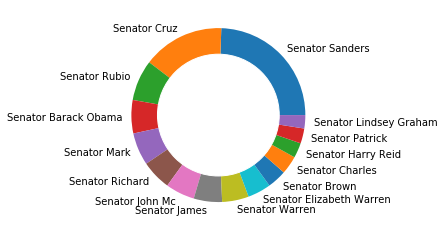

In [278]:
import matplotlib.pyplot as plt
from io import BytesIO
from reportlab.pdfgen import canvas
from reportlab.graphics import renderPDF
from svglib.svglib import svg2rlg

senators_raw, rate_raw = zip(*trump_top_senators)

ix = [0, 2, 4, 6, 7, 8, 9, 12, 13, 14, 16, 17, 18, 19, 20]

senators = [senators_raw[i] for i in ix]
rate = [rate_raw[i] for i in ix]

weights = rate
labels = senators

plt.pie(weights, labels=labels)

my_circle=plt.Circle( (0,0), 0.7, color="white")

p = plt.gcf()
p.gca().add_artist(my_circle)

imgdata = BytesIO()
plt.savefig(imgdata, format="svg")
imgdata.seek(0)

drawing = svg2rlg(imgdata)

pdf = canvas.Canvas("Trump report.pdf")

renderPDF.draw(drawing, pdf, 10, 300)
pdf.drawString(210, 640, "Trump Report - Senator Rating")

pdf.showPage()

pdf.save()